In [23]:
#load pandas dataframe
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [2]:
#imporiting csv into a dataframe
df = pd.read_csv("auto.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df1 = df.drop(columns=['car name'])

In [5]:
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [6]:
#finding any string values
df1['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
#verifying the type of the column
df1.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [8]:
#change to numerica and replace any strings with a nan
df1['horsepower'] = pd.to_numeric(df1['horsepower'], errors='coerce')

In [9]:
#confirming that everything is numerica and string has been replaced by nan value
df1['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [10]:
#finding out what the mean is
df1['horsepower'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64>

In [11]:
#replacing nan value with mean
df1['horsepower'] = df1['horsepower'].replace(np.nan, df1['horsepower'].mean)

In [12]:
#confirming nan variable was changed
df1['horsepower'].unique()

array([130.0, 165.0, 150.0, 140.0, 198.0, 220.0, 215.0, 225.0, 190.0,
       170.0, 160.0, 95.0, 97.0, 85.0, 88.0, 46.0, 87.0, 90.0, 113.0,
       200.0, 210.0, 193.0,
       <bound method NDFrame._add_numeric_operations.<locals>.mean of 0      130.0
       1      165.0
       2      150.0
       3      150.0
       4      140.0
              ...
       393     86.0
       394     52.0
       395     84.0
       396     79.0
       397     82.0
       Name: horsepower, Length: 398, dtype: float64>                             ,
       100.0, 105.0, 175.0, 153.0, 180.0, 110.0, 72.0, 86.0, 70.0, 76.0,
       65.0, 69.0, 60.0, 80.0, 54.0, 208.0, 155.0, 112.0, 92.0, 145.0,
       137.0, 158.0, 167.0, 94.0, 107.0, 230.0, 49.0, 75.0, 91.0, 122.0,
       67.0, 83.0, 78.0, 52.0, 61.0, 93.0, 148.0, 129.0, 96.0, 71.0, 98.0,
       115.0, 53.0, 81.0, 79.0, 120.0, 152.0, 102.0, 108.0, 68.0, 58.0,
       149.0, 89.0, 63.0, 48.0, 66.0, 139.0, 103.0, 125.0, 133.0, 138.0,
       135.0, 142.0, 77.0, 62.

In [13]:
#creating dummy variables for origin column
df1 = pd.get_dummies(df1, columns=['origin'])

In [14]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [15]:
#create correlation coefficient matrix
df1.corr()


C:\Users\brean\AppData\Local\Temp\ipykernel_15724\2109516268.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,mpg,cylinders,displacement,weight,acceleration,model year,origin_1,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
origin_1,-0.568192,0.604351,0.651407,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
origin_2,0.259022,-0.352861,-0.373886,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
origin_3,0.442174,-0.396479,-0.433505,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


[]

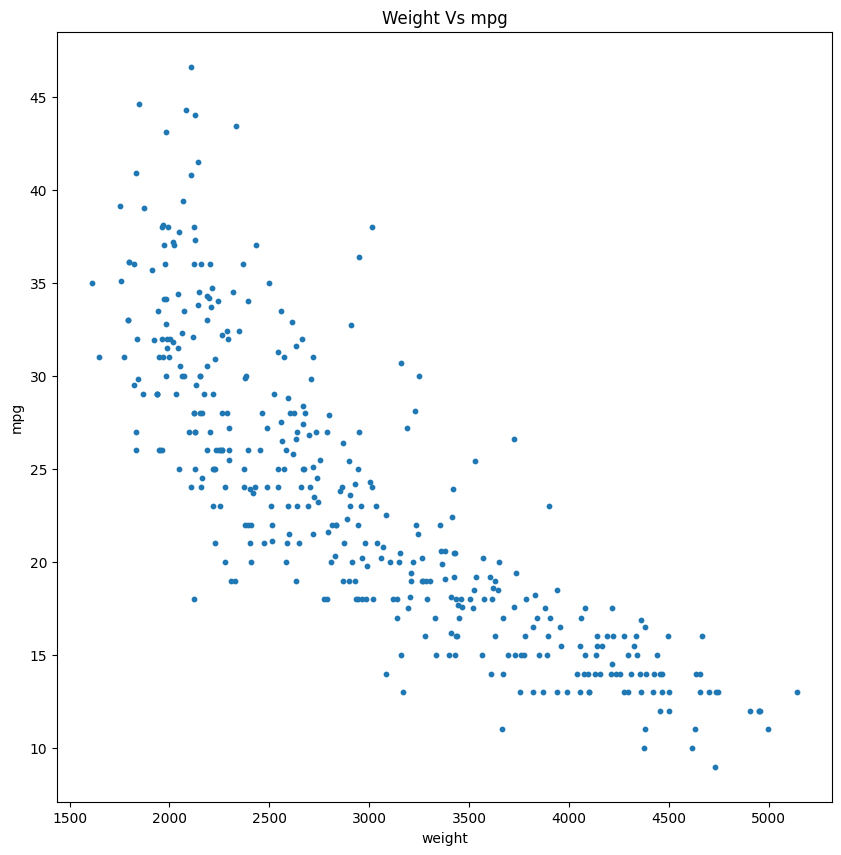

In [16]:
#map mpg vs weight
plt.figure(figsize=(10,10))
plt.scatter( df1['weight'], df1['mpg'], s = 10)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('Weight Vs mpg')
plt.plot()


how the graph and matrix relate:
In the matrix, if the weight is positive, the mpg is negative, and vice versa. This graph agrees with that. When weight is low, the mpg is high and as the weight increases, the mpg decreases. 

In [43]:
#create test/train set with 20% train
df1_train, df1_test = train_test_split(df1, test_size=0.2)

#splitting up the train/test with and without mpg
#originally had all of the columns in the train/test but kept getting errors so I tried to just limit it to one column and it's still not working. 
df_train_mpg = df1_train['mpg']
df_train = df1_train['weight']
df_test_mpg = df1_train['mpg']
df_test = df1_train['weight']

In [47]:
#other way I tried this

df_train_mpg = df1_train['mpg']
df_train = df1_train.drop(['mpg'], axis=1)
df_test_mpg = df1_train['mpg']
df_test = df1_train.drop(['mpg'], axis=1)

In [45]:
df_train_mpg = pd.to_numeric(df_train_mpg)
df_test_mpg = pd.to_numeric(df_test_mpg)

In [48]:
model = LinearRegression()
model.fit(df_train, df_train_mpg)

TypeError: float() argument must be a string or a number, not 'method'

In [40]:
#not sure why I can't get this linear regression??? 
model = LinearRegression().fit(df_train, df_train_mpg)
reg.score(df_train, df_train_mpg)

ValueError: Expected 2D array, got 1D array instead:
array=[1945 2110 2933 2290 4054 4295 3432 2625 2500 1834 2451 3210 2025 2330
 3265 1975 2490 2155 3353 4732 2515 2678 2190 2401 3777 4096 4082 2420
 2188 3193 4385 3278 2671 3430 2635 3520 2990 4140 4638 2489 3365 2120
 2865 2020 3574 3630 2125 3221 1995 2264 2300 2620 4360 2670 2205 2670
 2245 3900 1845 2464 2065 2755 2635 2408 3150 2506 4457 3155 3672 2003
 4274 2720 2957 3288 4215 4335 4278 2835 3880 2135 1613 2202 2914 2542
 2125 3755 2125 1968 1970 2595 2254 2875 3821 3160 3012 1850 2189 1835
 1755 1825 3672 2108 2511 2228 4209 2720 2434 4906 4997 2246 2164 2870
 3693 3525 4354 1795 2648 3282 3897 3060 1940 3360 3761 2065 3820 2572
 4668 2144 2815 2565 2210 1965 3955 2075 4237 3940 2265 3329 3336 4746
 2660 4129 2587 3270 2124 3830 1990 3850 2171 2984 4425 2930 2050 3233
 1965 1835 2150 1963 1975 4955 3399 3613 2408 4077 3420 1773 2735 3245
 2215 2395 2900 3158 1915 4154 2950 2901 2219 2155 3425 3169 3380 3530
 3140 2868 2123 3988 2542 3035 3570 3620 2158 2694 4498 2126 2070 3725
 4380 3870 2930 2372 2472 4633 3250 4190 4440 4735 3039 3230 1875 3425
 2720 2795 4654 3121 2130 4220 2278 3410 4382 2725 2430 2560 2904 2370
 2890 2905 2335 1985 2385 3015 2740 3433 2051 2545 2155 2145 2833 3070
 2019 3003 2945 1800 4657 3535 4141 2130 4499 2130 3785 2000 1950 2600
 1985 2665 4042 3563 2130 5140 2265 4165 4502 2110 4135 2525 4615 2582
 4464 3410 1825 2965 3651 2045 2200 3504 2255 3190 2230 3735 2592 3459
 2950 3302 2945 4376 3211 3609 4456 1955 2375 1836 1925 3645 1795 4294
 2575 4055 4257 4215 2945 3102 2405 2979 2391 3725 1950 2711 1990 2045
 2962 2790 3892 3415 2046 3086 2380 2395 2310 2774].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [25]:
predicted = model.predict(df_train)
actual = df_train_mpg

mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

TypeError: float() argument must be a string or a number, not 'method'

In [ ]:
predicted = model.predict(df_test)
actual = df_test_mpg
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
